In [42]:
import pandas as pd

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mlxtend
warnings.filterwarnings('ignore', category=FutureWarning)

In [43]:
mba = pd.read_csv('data.csv')
mba.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


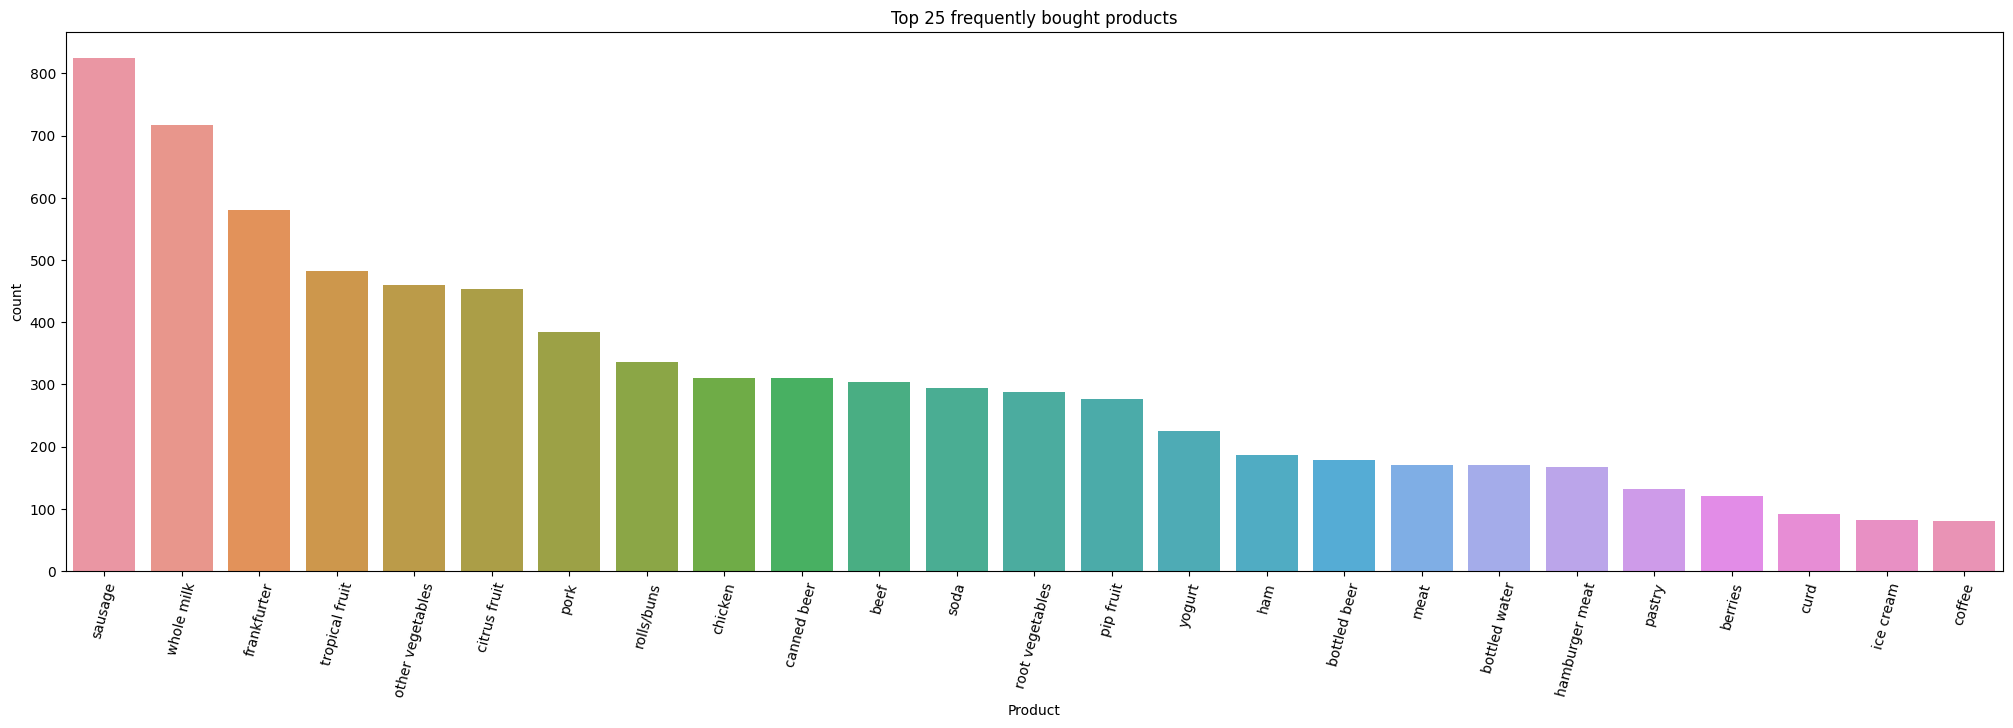

In [44]:
plt.rcParams['figure.figsize'] = 25, 7
sns.countplot(
    data=mba,
    x=mba['Item 1'],
    order=mba['Item 1'].value_counts().head(25).index,
)
plt.xticks(rotation=75)
plt.xlabel('Product')
plt.title('Top 25 frequently bought products')
plt.show()

In [45]:
# Preparing data using one-hot-encoding
data = pd.get_dummies(mba.drop(columns=['Item(s)'], axis=1), prefix="i")
data = data.groupby(level=0, axis=1).sum()
data

,i_Instant food products,i_UHT-milk,i_abrasive cleaner,i_artif. sweetener,i_baby cosmetics,i_baby food,i_bags,i_baking powder,i_bathroom cleaner,i_beef,...,i_turkey,i_vinegar,i_waffles,i_whipped/sour cream,i_whisky,i_white bread,i_white wine,i_whole milk,i_yogurt,i_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data = data.astype(bool)
freq_itemsets = mlxtend.frequent_patterns.apriori(data, min_support=0.015, use_colnames=True)
freq_itemsets

,support,itemsets
0,0.033452,(i_UHT-milk)
1,0.017692,(i_baking powder)
2,0.052466,(i_beef)
3,0.033249,(i_berries)
4,0.026029,(i_beverages)
...,...,...
175,0.023183,"(i_root vegetables, i_other vegetables, i_whol..."
176,0.017082,"(i_whole milk, i_tropical fruit, i_other veget..."
177,0.022267,"(i_whole milk, i_yogurt, i_other vegetables)"
178,0.015557,"(i_whole milk, i_yogurt, i_rolls/buns)"


In [49]:
freq_itemsets[(freq_itemsets['support']>0.1)]

,support,itemsets
6,0.110524,(i_bottled water)
45,0.193493,(i_other vegetables)
54,0.183935,(i_rolls/buns)
55,0.108998,(i_root vegetables)
61,0.174377,(i_soda)
66,0.104931,(i_tropical fruit)
71,0.255516,(i_whole milk)
72,0.139502,(i_yogurt)


In [50]:
rules = association_rules(freq_itemsets,metric='lift',min_threshold=1)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
224,"(i_tropical fruit, i_yogurt)",(i_whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528,0.521384
212,"(i_yogurt, i_other vegetables)",(i_whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
33,(i_butter),(i_whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817,0.514659
59,(i_curd),(i_whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085,0.505984
198,"(i_root vegetables, i_other vegetables)",(i_whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687,0.501524
...,...,...,...,...,...,...,...,...,...,...
38,(i_whole milk),(i_chocolate),0.255516,0.049619,0.016675,0.065261,1.315243,0.003997,1.016734,0.321947
54,(i_whole milk),(i_cream cheese),0.255516,0.039654,0.016472,0.064465,1.625670,0.006339,1.026520,0.516961
219,(i_whole milk),"(i_yogurt, i_rolls/buns)",0.255516,0.034367,0.015557,0.060883,1.771563,0.006775,1.028235,0.585005
225,(i_whole milk),"(i_tropical fruit, i_yogurt)",0.255516,0.029283,0.015150,0.059292,2.024770,0.007668,1.031900,0.679822


In [51]:
rules[(rules['confidence']>0.5) & (rules['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
212,"(i_yogurt, i_other vegetables)",(i_whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577
224,"(i_tropical fruit, i_yogurt)",(i_whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528,0.521384
